# LSN Exercise 5

## 5.1 Uniform sampling

<IPython.core.display.Javascript object>


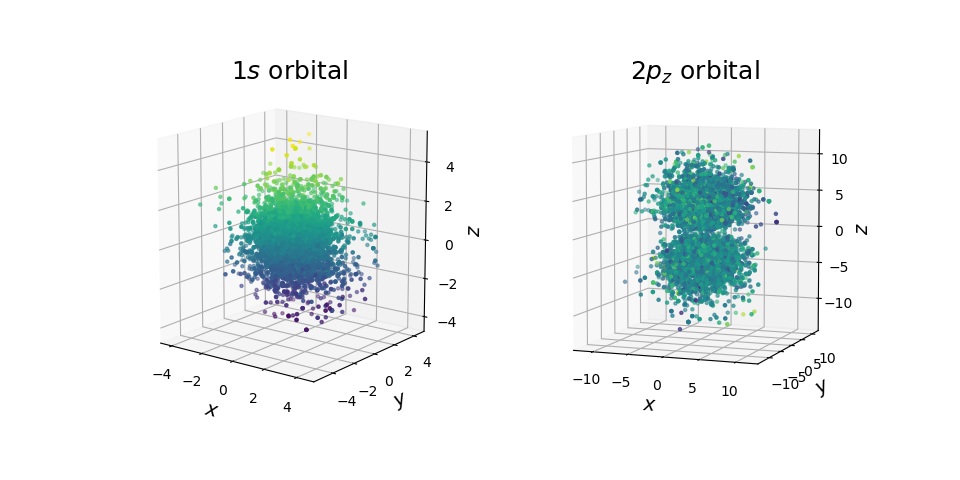

In [26]:
%matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d as IIIDplot

TITLE_SIZE = 18
LABEL_SIZE = 14
scale = 5
FIG_SIZE = (scale*0.5*(1+np.sqrt(5)),scale)

file = open("X_s.txt")
X_s = [float(i) for i in file.read().splitlines()]
file.close()

file = open("Y_s.txt")
Y_s = [float(i) for i in file.read().splitlines()]
file.close()

file = open("Z_s.txt")
Z_s = [float(i) for i in file.read().splitlines()]
file.close()

file = open("X_p.txt")
X_p = [float(i) for i in file.read().splitlines()]
file.close()

file = open("Y_p.txt")
Y_p = [float(i) for i in file.read().splitlines()]
file.close()

file = open("Z_p.txt")
Z_p = [float(i) for i in file.read().splitlines()]
file.close()

fig = plt.figure(figsize=plt.figaspect(0.5))

ax1 = fig.add_subplot(1,2,1, projection='3d')
ax1.scatter(X_s, Y_s, Z_s, c=Z, marker='.')
ax1.set_title("$ 1s $ orbital", fontsize=TITLE_SIZE)
ax1.set_xlabel('$ x $', fontsize=LABEL_SIZE)
ax1.set_ylabel('$ y $', fontsize=LABEL_SIZE)
ax1.set_zlabel('$ z $', fontsize=LABEL_SIZE)

ax2 = fig.add_subplot(1,2,2, projection='3d')
ax2.scatter(X_p, Y_p, Z_p, c=Z, marker='.')
ax2.set_title("$ 2p_z $ orbital", fontsize=TITLE_SIZE)
ax2.set_xlabel('$ x $', fontsize=LABEL_SIZE)
ax2.set_ylabel('$ y $', fontsize=LABEL_SIZE)
ax2.set_zlabel('$ z $', fontsize=LABEL_SIZE)

plt.show()

<IPython.core.display.Javascript object>


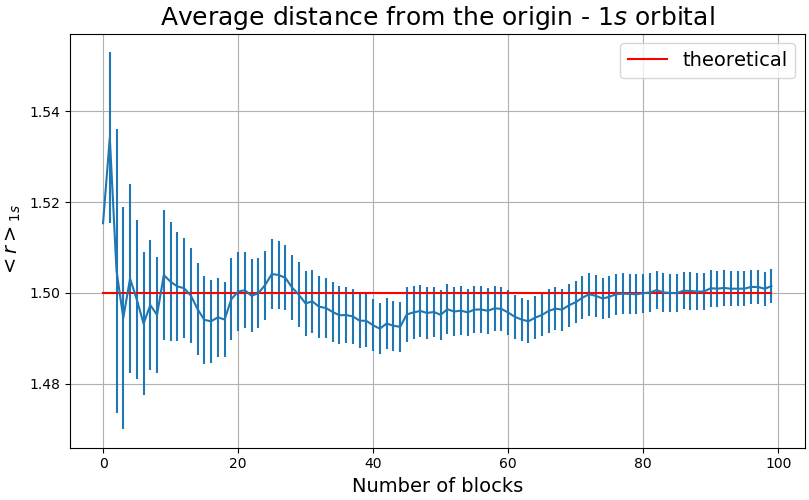

In [51]:
file = open("Mean_unif_s.txt")
mean = [float(i) for i in file.read().splitlines()]
file.close()

file = open("Error_unif_s.txt")
error = [float(i) for i in file.read().splitlines()]
file.close()

N = np.arange(len(mean))

exp = [1.5 for i in N]

scale = 5

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.errorbar(N, mean, yerr=error)
plt.title("Average distance from the origin - $ 1s $ orbital", fontsize=TITLE_SIZE)
plt.plot(N, exp, color='red', label='theoretical')
plt.xlabel("Number of blocks", fontsize=LABEL_SIZE)
plt.ylabel("$ <r>_{1s} $", fontsize=LABEL_SIZE)
plt.legend(fontsize=LABEL_SIZE)
plt.grid(True)

<IPython.core.display.Javascript object>


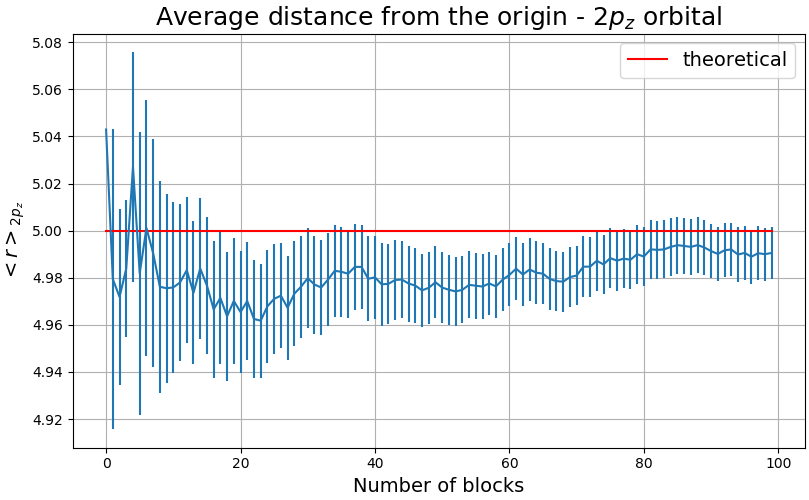

In [52]:
file = open("Mean_unif_p.txt")
mean = [float(i) for i in file.read().splitlines()]
file.close()

file = open("Error_unif_p.txt")
error = [float(i) for i in file.read().splitlines()]
file.close()

exp = [5.0 for i in N]

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.errorbar(N, mean, yerr=error)
plt.title("Average distance from the origin - $ 2p_z $ orbital", fontsize=TITLE_SIZE)
plt.plot(N, exp, color='red', label='theoretical')
plt.xlabel("Number of blocks", fontsize=LABEL_SIZE)
plt.ylabel("$ <r>_{2p_z} $", fontsize=LABEL_SIZE)
plt.legend(fontsize=LABEL_SIZE)
plt.grid(True)

## 5.2 Normal sampling

<IPython.core.display.Javascript object>


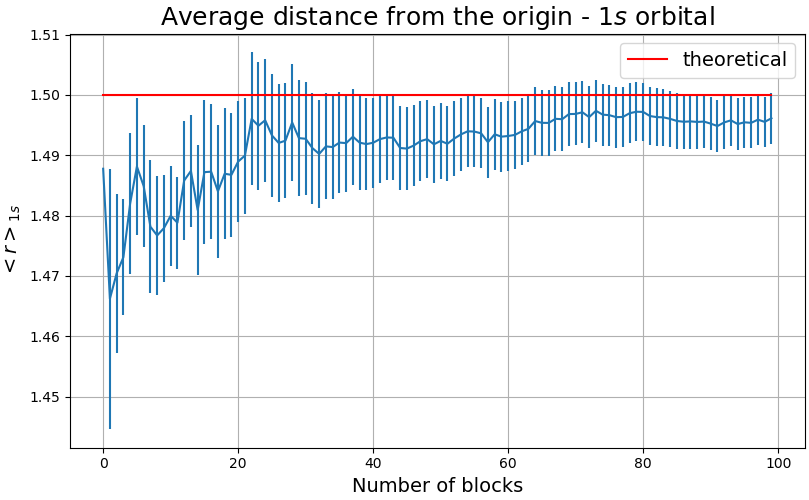

In [53]:
file = open("Mean_norm_s.txt")
mean = [float(i) for i in file.read().splitlines()]
file.close()

file = open("Error_norm_s.txt")
error = [float(i) for i in file.read().splitlines()]
file.close()

exp = [1.5 for i in N]

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.errorbar(N, mean, yerr=error)
plt.title("Average distance from the origin - $ 1s $ orbital", fontsize=TITLE_SIZE)
plt.plot(N, exp, color='red', label='theoretical')
plt.xlabel("Number of blocks", fontsize=LABEL_SIZE)
plt.ylabel("$ <r>_{1s} $", fontsize=LABEL_SIZE)
plt.legend(fontsize=LABEL_SIZE)
plt.grid(True)

<IPython.core.display.Javascript object>


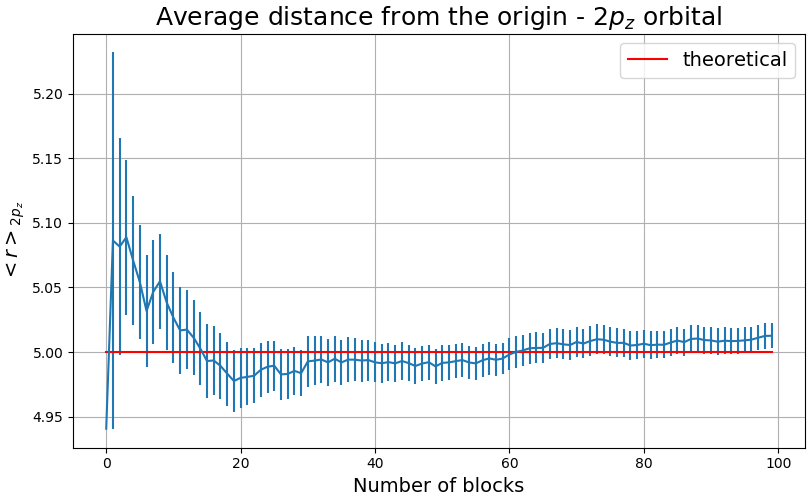

In [54]:
file = open("Mean_norm_p.txt")
mean = [float(i) for i in file.read().splitlines()]
file.close()

file = open("Error_norm_p.txt")
error = [float(i) for i in file.read().splitlines()]
file.close()

exp = [5.0 for i in N]

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.errorbar(N, mean, yerr=error)
plt.title("Average distance from the origin - $ 2p_z $ orbital", fontsize=TITLE_SIZE)
plt.plot(N, exp, color='red', label='theoretical')
plt.xlabel("Number of blocks", fontsize=LABEL_SIZE)
plt.ylabel("$ <r>_{2p_z} $", fontsize=LABEL_SIZE)
plt.legend(fontsize=LABEL_SIZE)
plt.grid(True)